In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import train_test_split

import acquire
import prepare

from scipy import stats

In [227]:
# Creating DataFrame from SQL
df = acquire.get_telco_data()

In [228]:
# Remove useless columns from incoming dataframe
df = df.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

# Fix incoming dataframe column with numerical values set as string type
df = df.loc[:,~df.columns.duplicated()].copy()

# Fix incoming dataframe column with numerical values set as string type
df['total_charges'] = (df.total_charges + '0').astype('float')

# Creating New Feature
addons = ['online_security','online_backup','device_protection', 'tech_support', 'streaming_tv','streaming_movies']
addon_sum=(df[addons]=='Yes').sum(axis=1)
df=df.assign(addon_sum=addon_sum)

In [229]:
df['customer_id'].size

7043

In [202]:
# Save DF as CSV
import os  
os.makedirs('tableau', exist_ok=True)  
df.to_csv('tableau/out.csv')

In [203]:
df[df['churn']=='Yes']['churn'].count()

1869

In [204]:
df[df['churn']=='No']['churn'].count()

5174

In [205]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'churn_month', 'signup_date', 'addon_sum'],
      dtype='object')

In [206]:
df[df['churn']=='No'].head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,churn_month,signup_date,addon_sum
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,65.6,593.3,No,DSL,Mailed check,One year,None,2021-04-21 18:07:34,3


In [207]:
df.groupby(['churn'])['churn'].count()

churn
No     5174
Yes    1869
Name: churn, dtype: int64

In [208]:
df.groupby(['addon_sum'])['addon_sum'].count()

addon_sum
0    2219
1     966
2    1033
3    1118
4     852
5     571
6     284
Name: addon_sum, dtype: int64

In [209]:
churn_percent = df[df['churn']=='Yes']['churn'].count() / df['churn'].count()

In [210]:
print(round(churn_percent,3))

0.265


In [212]:
df['churn']

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039    Yes
7040    Yes
7041     No
7042     No
Name: churn, Length: 7043, dtype: object

In [213]:
# Highest Possible Addon Count
df['addon_sum'].idxmax()

6

In [214]:
df.groupby(['addon_sum','churn'])['churn'].count()

addon_sum  churn
0          No       1744
           Yes       475
1          No        524
           Yes       442
2          No        663
           Yes       370
3          No        812
           Yes       306
4          No        662
           Yes       190
5          No        500
           Yes        71
6          No        269
           Yes        15
Name: churn, dtype: int64

In [215]:
df[df['churn']=='Yes'].groupby(['addon_sum'])['addon_sum'].count()

addon_sum
0    475
1    442
2    370
3    306
4    190
5     71
6     15
Name: addon_sum, dtype: int64

In [216]:
# Looping through total of each CHURN of ADDON_SUM and finding DIFFERENCE
for i in range(df['addon_sum'].idxmax()):
    loop_current_total = df[(df['churn']=='Yes') & (df['addon_sum']==(i))]['churn'].count()
    if i >= 1 & i<5:
        next_current_total = df[(df['churn']=='Yes') & (df['addon_sum']==(i+1))]['churn'].count()
        print(loop_current_total - next_current_total)

33
72
64
116
119
56


In [217]:
df[(df['churn']=='Yes') & (df['addon_sum']==1)]['churn'].count()

442

In [218]:
churn_chart = pd.DataFrame(df[df['churn']=='No'].groupby(['addon_sum'])['addon_sum'].count())

In [219]:
churn_chart.T

addon_sum,0,1,2,3,4,5,6
addon_sum,1744,524,663,812,662,500,269


In [220]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'churn_month', 'signup_date', 'addon_sum'],
      dtype='object')

In [221]:
churn_chart_2 = df.groupby(['addon_sum','churn'])['churn'].count()

In [141]:
df.shape

(7043, 24)

In [150]:
df[(df['internet_service_type']=='DSL')&(df['churn']=='Yes')]['churn'].count()

459

In [172]:
df[(df['internet_service_type']=='DSL')&(df['churn']=='Yes')]['churn'].count()

459

In [ ]:
df[df['churn']=='Yes'][inte].count()

In [ ]:
for i in df.columns:
    print(df[df['churn']=='Yes'][i].count())

In [173]:
df[(df['senior_citizen']==True) & (df['churn']=='Yes')]['churn'].count()

476

In [180]:
df['tenure']

0        9
1        9
2        4
3       13
4        3
        ..
7038     7
7039     1
7040     4
7041     2
7042    63
Name: tenure, Length: 7043, dtype: int64

In [168]:
# create bins of equal intervals
tenure_bins = pd.cut(df['tenure'], 4)

In [222]:
tenure_bins

0       (-0.072, 18.0]
1       (-0.072, 18.0]
2       (-0.072, 18.0]
3       (-0.072, 18.0]
4       (-0.072, 18.0]
             ...      
7038    (-0.072, 18.0]
7039    (-0.072, 18.0]
7040    (-0.072, 18.0]
7041    (-0.072, 18.0]
7042      (54.0, 72.0]
Name: tenure, Length: 7043, dtype: category
Categories (4, interval[float64, right]): [(-0.072, 18.0] < (18.0, 36.0] < (36.0, 54.0] < (54.0, 72.0]]

In [181]:
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables
    you are comparing (group1 and group2) and return a string stating 
    whether or not there exists a relationship between the 2 groups. 
    '''
    if p < alpha:
        return f'There exists some relationship between {group1} and {group2}. (p-value: {p:.4f})'
    else:
        return f'There is not a significant relationship between {group1} and {group2}. (p-value: {p:.4f})'

In [186]:
group1='addon_sum'
group2='churn'

In [190]:
observed = pd.crosstab(tenure_bins, df[group2])
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)
observed_out = observed.values
expected_out = expected.astype(int)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed_out)

# print --- and then a new line, 'Expected Values', followed by another new line
print('------\nExpected Values\n')

# print the expected values array
print(expected_out)

# print a new line
print('-----\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2: .4f}')

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p: .4f}')
print('Is p-value < alpha?', p < alpha)

eval_results(p, alpha, group1, group2)

Observed Values

[[1520 1214]
 [1011  297]
 [ 969  213]
 [1674  145]]
------
Expected Values

[[2008  725]
 [ 960  347]
 [ 868  313]
 [1336  482]]
-----

chi^2 =  823.1179
p-value =  0.0000
Is p-value < alpha? True


'There exists some relationship between gender and churn. (p-value: 0.0000)'

In [223]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'churn_month', 'signup_date', 'addon_sum'],
      dtype='object')

<AxesSubplot: xlabel='tenure', ylabel='count'>

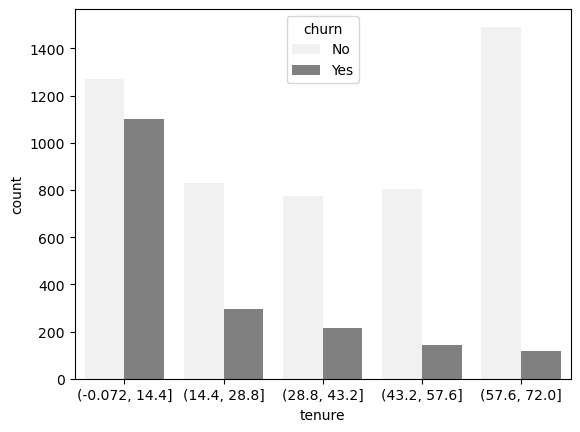

In [258]:
# create bins of equal intervals
tenure_bins = pd.cut(df['tenure'], 5)

# plot
sns.countplot(x=tenure_bins, color='grey',hue=df['churn'])

\chi

In [ ]:
teset_csv

In [231]:
speed = df['churn']

plot_tenure = pd.DataFrame({'churn': speed,
                    'tenure': tenure_bins})
plot_tenure.

TypeError: no numeric data to plot

In [188]:
group1='gender'
group2='churn'

In [189]:
observed = pd.crosstab(df[group1], df[group2])
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)
observed_out = observed.values
expected_out = expected.astype(int)
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed_out)

# print --- and then a new line, 'Expected Values', followed by another new line
print('------\nExpected Values\n')

# print the expected values array
print(expected_out)

# print a new line
print('-----\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2: .4f}')

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p: .4f}')
print('Is p-value < alpha?', p < alpha)

eval_results(p, alpha, group1, group2)

Observed Values

[[2549  939]
 [2625  930]]
------
Expected Values

[[2562  925]
 [2611  943]]
-----

chi^2 =  0.4841
p-value =  0.4866
Is p-value < alpha? False


'There is not a significant relationship between gender and churn. (p-value: 0.4866)'

In [279]:
df[(df['addon_sum']<=1)&(df['churn']=='Yes')].count()

customer_id              917
gender                   917
senior_citizen           917
partner                  917
dependents               917
tenure                   917
phone_service            917
multiple_lines           917
online_security          917
online_backup            917
device_protection        917
tech_support             917
streaming_tv             917
streaming_movies         917
paperless_billing        917
monthly_charges          917
total_charges            917
churn                    917
internet_service_type    917
payment_type             917
contract_type            917
churn_month              917
signup_date              917
addon_sum                917
dtype: int64

In [303]:
df['churn'].groupby('tenure')

KeyError: 'tenure'

In [304]:
churn_v_tenure = pd.DataFrame(df[df['churn']=='No']['tenure'].value_counts(bins=10))

In [305]:
churn_v_tenure.T

,"(64.8, 72.0]","(-0.073, 7.2]","(7.2, 14.4]","(57.6, 64.8]","(21.6, 28.8]","(28.8, 36.0]","(50.4, 57.6]","(14.4, 21.6]","(43.2, 50.4]","(36.0, 43.2]"
tenure,1037,777,495,455,430,428,425,401,380,346


In [299]:
df[(df['tenure']<=8)&(df['churn']=='Yes')].count()

customer_id              877
gender                   877
senior_citizen           877
partner                  877
dependents               877
tenure                   877
phone_service            877
multiple_lines           877
online_security          877
online_backup            877
device_protection        877
tech_support             877
streaming_tv             877
streaming_movies         877
paperless_billing        877
monthly_charges          877
total_charges            877
churn                    877
internet_service_type    877
payment_type             877
contract_type            877
churn_month              877
signup_date              877
addon_sum                877
dtype: int64

In [269]:
df[(df['tenure']<100)].count()

customer_id              7043
gender                   7043
senior_citizen           7043
partner                  7043
dependents               7043
tenure                   7043
phone_service            7043
multiple_lines           7043
online_security          7043
online_backup            7043
device_protection        7043
tech_support             7043
streaming_tv             7043
streaming_movies         7043
paperless_billing        7043
monthly_charges          7043
total_charges            7043
churn                    7043
internet_service_type    7043
payment_type             7043
contract_type            7043
churn_month              1869
signup_date              7043
addon_sum                7043
dtype: int64

In [262]:
df[df['churn']=='Yes']['tenure'].count()

1869